# Polynomial regression

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
print(dataset.head(10))
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

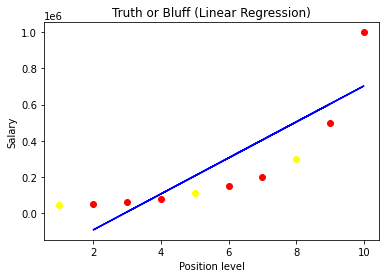

In [16]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Visualizing the Linear Regression results

plt.scatter(X_train, y_train, color='red')
plt.scatter(X_test, y_test, color='yellow')
plt.plot(X_train, lin_reg.predict(X_train), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [17]:
# evaluate
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train, lin_reg.predict(X_train))/1000000000)

y_test_pred = lin_reg.predict(X_test)
print(mean_squared_error(y_test, y_test_pred)/1000000000)

26.964285714285705
35.615755208333304


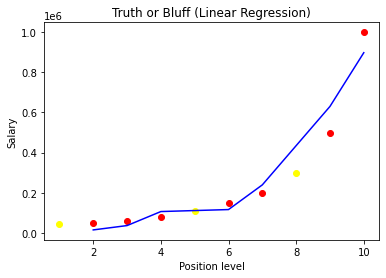

In [18]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

# Visualizing the Polymonial Regression results
#print(np.sort(X_train,axis=None))
test = pol_reg.predict(poly_reg.fit_transform(X_train))
#print(np.sort(test,axis=None))
plt.scatter(X_train, y_train, color='red')
plt.scatter(X_test, y_test, color='yellow')
plt.plot(np.sort(X_train,axis=None), np.sort(test,axis=None), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Evaluation

In [19]:
# evaluate
print(mean_squared_error(y_train,  test)/1000000000)

y_test_pred2 =  pol_reg.predict(poly_reg.fit_transform(X_test))
print(mean_squared_error(y_test, y_test_pred2)/1000000000)


5.431361997895859
16.363215272011566


In [24]:
y_pred = pol_reg.predict(X_poly)
print("MSE polynomial = ", mean_squared_error(y_train,y_pred))

rms = mean_squared_error(y_train, y_pred, squared=False)
print("RMSE polynomial = ", rms)

MSE polynomial =  5431361997.895859
RMSE polynomial =  73697.7747146809


In [23]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred))

0.9479530766423716


## Prediction

In [20]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
#output should be 249500

# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
#output should be 132148.43750003

array([72501.50911505])